### Topic 4: Georgaphical Factors Affecting Frequency of Armed Conflict

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy import stats
from functools import partial, reduce

In [2]:
# Collect the master csv data from data cleanup
master_csv = pd.read_csv('Resources/master_data.csv')

# Filter by selected date range 1980 - 2015
master_dates_df = master_csv[master_csv['Year'].between(1980,2015)]

#### Geographical Factors Dataframes

In [3]:
# Calculate the average precipitation by region
avg_precip_reg = master_dates_df.groupby(['region'])['Precipitation'].mean()

# Calculate the average freshwater/capita by region
avg_frshw_reg = master_dates_df.groupby(['region'])['FrshW / Cap'].mean()

# Calculate the average surface temperature by region
avg_temp_reg = master_dates_df.groupby(['region'])['Surf Temp'].mean()

# Count number of conflicts per region
conf_reg = master_dates_df[master_dates_df['Conflict Name'] != 'No Conflict'].groupby('region').size()

# Create a new dataframe by region for these three measures
region_geo_df = pd.DataFrame({'Precipitation': avg_precip_reg,
                              'FrshW / Cap': avg_frshw_reg,
                              'Surf Temp': avg_temp_reg,
                              'No. Conflicts': conf_reg}).reset_index()
region_geo_df.head()

,region,Precipitation,FrshW / Cap,Surf Temp,No. Conflicts
0,Africa,586.466880,6438.632196,0.439312,377
1,Americas,1019.338413,26627.704906,0.377714,758
2,Asia,641.060778,3129.129301,0.352715,2492
3,Europe,636.611425,25807.690735,0.610627,774
4,Oceania,736.967836,32776.250048,0.155702,4


In [4]:
# Calculate the average precipitation by subregion
avg_precip_subreg = master_dates_df.groupby(['sub-region'])['Precipitation'].mean()

# Calculate the average freshwater/capita by subregion
avg_frshw_subreg = master_dates_df.groupby(['sub-region'])['FrshW / Cap'].mean()

# Calculate the average surface temperature by subregion
avg_temp_subreg = master_dates_df.groupby(['sub-region'])['Surf Temp'].mean()

# Count number of conflicts per subregion
conf_subreg = master_dates_df[master_dates_df['Conflict Name'] != 'No Conflict'].groupby('sub-region').size()

# Create a new dataframe by subregion for these three measures
subregion_geo_df = pd.DataFrame({'Precipitation': avg_precip_subreg,
                                 'FrshW / Cap': avg_frshw_subreg,
                                 'Surf Temp': avg_temp_subreg,
                                 'No. Conflicts': conf_subreg}).reset_index().fillna(0)

# Check if all values in a row are 0
mask = (subregion_geo_df == 0).all(axis=1)

# Filter out rows with all 0 values
subregion_geo_df = subregion_geo_df[~(subregion_geo_df[['Precipitation', 'FrshW / Cap', 'FrshW / Cap']] == 0).all(axis=1)]

# Change values to integers
subregion_geo_df['No. Conflicts'] = subregion_geo_df['No. Conflicts'].astype(int)

subregion_geo_df.head(1)

,sub-region,Precipitation,FrshW / Cap,Surf Temp,No. Conflicts
0,Australia and New Zealand,1192.442748,59850.647879,0.43613,4


In [5]:
# Calculate the average precipitation by country
avg_precip_country = master_dates_df.groupby(['Country'])['Precipitation'].mean()

# Calculate the average freshwater/capita by country
avg_frshw_country = master_dates_df.groupby(['Country'])['FrshW / Cap'].mean()

# Calculate the average surface temperature by country
avg_temp_country = master_dates_df.groupby(['Country'])['Surf Temp'].mean()

# Count number of conflicts per country
conf_country = master_dates_df[master_dates_df['Conflict Name'] != 'No Conflict'].groupby('Country').size()

# Create a new dataframe by country for these three measures
country_geo_df = pd.DataFrame({'Precipitation': avg_precip_country,
                               'FrshW / Cap': avg_frshw_country,
                               'Surf Temp': avg_temp_country,
                               'No. Conflicts': conf_country}).reset_index().fillna(0)

# Filter out rows with all 0 values
country_geo_df = country_geo_df[~(country_geo_df[['Precipitation', 'FrshW / Cap', 'FrshW / Cap']] == 0).all(axis=1)]

# Change values to integers
country_geo_df['No. Conflicts'] = country_geo_df['No. Conflicts'].astype(int)

country_geo_df.head(1)

,Country,Precipitation,FrshW / Cap,Surf Temp,No. Conflicts
1,Albania,1485.0,8743.954812,0.68128,64


In [6]:
# Calculate the average precipitation by year
avg_precip_yr = master_dates_df.groupby(['Year'])['Precipitation'].mean()

# Calculate the average freshwater/capita by year
avg_frshw_yr = master_dates_df.groupby(['Year'])['FrshW / Cap'].mean()

# Calculate the average surface temperature by year
avg_temp_yr = master_dates_df.groupby(['Year'])['Surf Temp'].mean()

# Count number of conflicts per country
conf_yr = master_dates_df[master_dates_df['Conflict Name'] != 'No Conflict'].groupby('Year').size()

# Create a new dataframe by country for these three measures
yr_geo_df = pd.DataFrame({'Precipitation': avg_precip_yr,
                          'FrshW / Cap': avg_frshw_yr,
                          'Surf Temp': avg_temp_yr,
                          'No. Conflicts': conf_yr}).reset_index().fillna(0)

# Change values to integers
yr_geo_df['Year'] = yr_geo_df['Year'].astype(int)
yr_geo_df['No. Conflicts'] = yr_geo_df['No. Conflicts'].astype(int)

yr_geo_df.head(1)

,Year,Precipitation,FrshW / Cap,Surf Temp,No. Conflicts
0,1980,645.906849,15496.346293,0.136282,101


#### Defined Functions

In [7]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y):
    
    # Perform a linear regression on x and y variables
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Get regression values
    regress_values = x * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    return (line_eq)

In [8]:
# Define a function to identify outliers
def dataset_analysis(dataset, df):

    # Get the from a column dataframe
    data = df[dataset]
        
    # Calculate mean, median, mode, quartiles, IQR, and bounds
    min = data.min()
    max = data.max()
    mean = data.mean()
    median = data.median()
    quartiles = data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify potential outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Print the results
    print(f"")
    print(f"------------------------------------------")
    print(f"Analysis of {dataset} dataset is: ") 
    print(f"")
    print(f"Min: {min}")
    print(f"Max: {max}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    
    # Store outliers only if there are any
    if not outliers.empty:
        print(f"Outliers: {outliers}")
        print(f"------------------------------------------")
        print(f"")
    
    # Check if any outliers were found
    if outliers.empty:
        print(f"Outliers: no outliers found")
        print(f"------------------------------------------")

#### Overview Analysis

In [9]:
# Analysze the datasets
analysis_ncc = dataset_analysis('No. Conflicts',country_geo_df)


------------------------------------------
Analysis of No. Conflicts dataset is: 

Min: 0
Max: 1290
Mean: 28.065040650406505
Median: 1.0
Lower Quartile: 0.0
Upper Quartile: 18.5
IQR: 18.5
Lower Bound: -27.75
Upper Bound: 46.25
Outliers: 1        64
16       56
30       74
60      132
64       58
66       56
77      286
79      150
81     1290
82       62
93      108
96       68
127     138
159      62
167     122
Name: No. Conflicts, dtype: int32
------------------------------------------



In [10]:
analysis_psc = dataset_analysis('Precipitation',country_geo_df)


------------------------------------------
Analysis of Precipitation dataset is: 

Min: 56.0
Max: 3219.0666666666666
Mean: 1188.9111440043905
Median: 1039.0
Lower Quartile: 535.0
Upper Quartile: 1778.455223880597
IQR: 1243.455223880597
Lower Bound: -1330.1828358208954
Upper Bound: 3643.6380597014922
Outliers: no outliers found
------------------------------------------


In [11]:
analysis_fwc = dataset_analysis('FrshW / Cap',country_geo_df)


------------------------------------------
Analysis of FrshW / Cap dataset is: 

Min: 0.0
Max: 618985.9030294117
Mean: 25391.377958073354
Median: 3342.243977980769
Lower Quartile: 1124.1722297176716
Upper Quartile: 20296.59086366705
IQR: 19172.41863394938
Lower Bound: -27634.4557212064
Upper Bound: 49055.21881459112
Outliers: 17      67255.992674
19     143864.818102
30      93281.254973
33      60361.198416
35      55557.465602
61     135150.803191
71     317982.940352
76     618985.903029
95      72242.081552
119     87737.004317
125     84957.112551
130    152503.445607
132     66768.967148
155    110674.707521
162    212350.843618
184     57056.603778
Name: FrshW / Cap, dtype: float64
------------------------------------------



In [12]:
analysis_stc = dataset_analysis('Surf Temp',country_geo_df)


------------------------------------------
Analysis of Surf Temp dataset is: 

Min: 0.14778461538461538
Max: 1.3136222222222222
Mean: 0.6520341455196742
Median: 0.6145217391304348
Lower Quartile: 0.4749815789473684
Upper Quartile: 0.7847727146042363
IQR: 0.30979113565686783
Lower Bound: 0.0102948754620667
Upper Bound: 1.249459418089538
Outliers: 92     1.313622
139    1.249708
178    1.302156
Name: Surf Temp, dtype: float64
------------------------------------------



#### Global Pie Charts

Source Bureau of Reclamation: https://www.usbr.gov/mp/arwec/water-facts-ww-water-sup.html

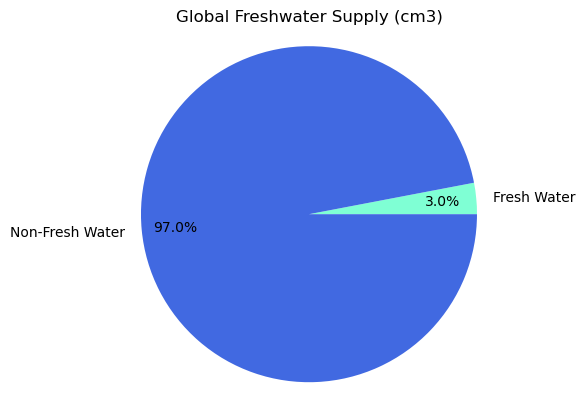

In [13]:
# Create a dataframe using water totals in cubic miles from the US B
world_labels = ['Fresh Water', 'Non-Fresh Water']
world_data = [9780000, 316220000]

# Global Worldwide Water Supply Pie Chart
plt.pie(world_data, labels=world_labels, colors=['aquamarine', 'royalblue'], pctdistance=.80, autopct="%1.1f%%", startangle=0)
plt.title("Global Freshwater Supply (cm3)")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#plt.savefig("../Images/World_Water_Pie.png")
plt.show()

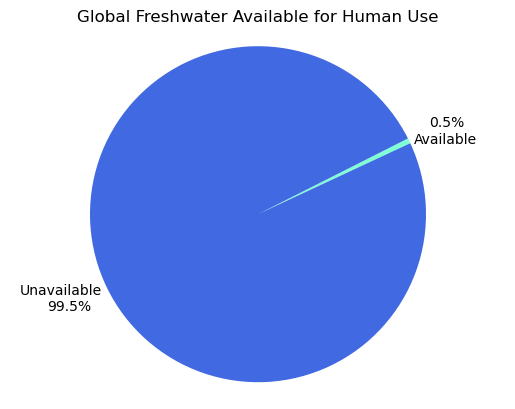

In [14]:
# Create a dataframe using water totals in cubic miles from the US B
world_labels = ['Available', 'Unavailable']
world_data = [1630000, 324370000]

# Global Worldwide Water Supply Pie Chart
plt.pie(world_data, labels=world_labels, colors=['aquamarine', 'royalblue'], pctdistance=1.25, labeldistance=1.03, 
        autopct='%1.1f%%', startangle=25)
plt.title("Global Freshwater Available for Human Use")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#plt.savefig("../Images/World_Water_Pie2.png")
plt.show()

#### Regional Bar Charts

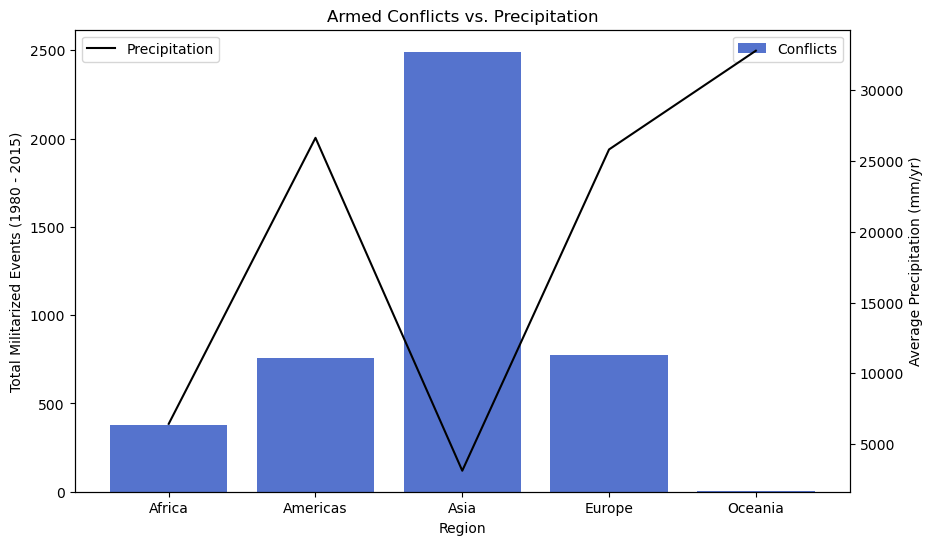

In [15]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the primary axis
sns.barplot(data=region_geo_df, x='region', y='No. Conflicts', color='royalblue', label='Conflicts', ax=ax1)

# Add title and labels for the bar chart
ax1.set_title('Armed Conflicts vs. Precipitation')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Militarized Events (1980 - 2015)')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line plot on the secondary axis
sns.lineplot(data=region_geo_df, x='region', y='FrshW / Cap', color='black', label='Precipitation', ax=ax2)
ax2.set_ylabel('Average Precipitation (mm/yr)', color='black')

# Show the plot
plt.show()

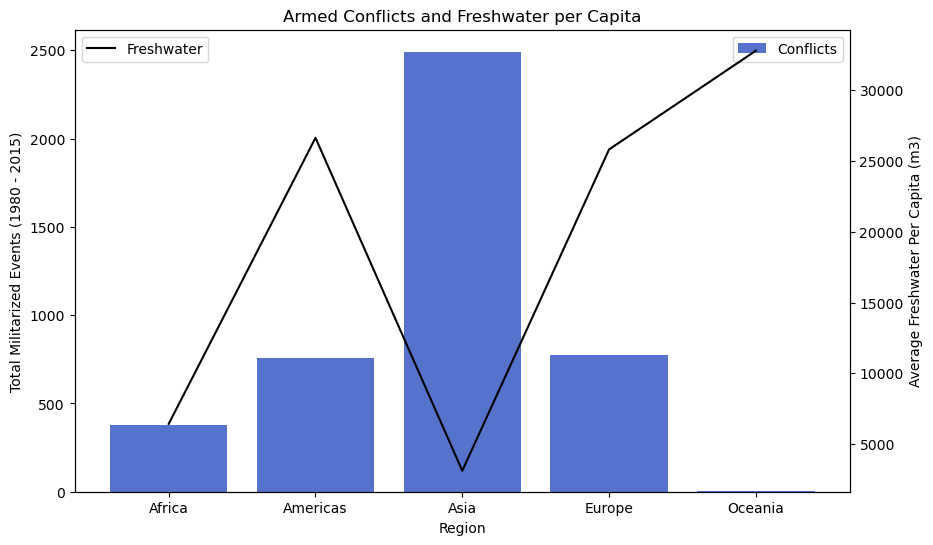

In [16]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the primary axis
sns.barplot(data=region_geo_df, x='region', y='No. Conflicts', color='royalblue', label='Conflicts', ax=ax1)

# Add title and labels for the bar chart
ax1.set_title('Armed Conflicts and Freshwater per Capita')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Militarized Events (1980 - 2015)')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line plot on the secondary axis
sns.lineplot(data=region_geo_df, x='region', y='FrshW / Cap', color='black', label='Freshwater', ax=ax2)
ax2.set_ylabel('Average Freshwater Per Capita (m3)', color='black')

# Show the plot
plt.show()

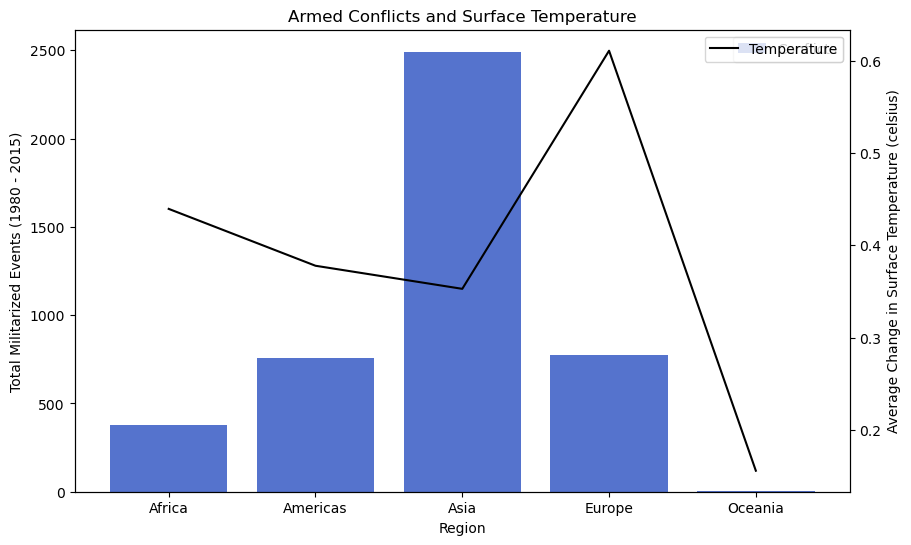

In [17]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the primary axis
sns.barplot(data=region_geo_df, x='region', y='No. Conflicts', color='royalblue', label='Conflicts', ax=ax1)

# Add title and labels for the bar chart
ax1.set_title('Armed Conflicts and Surface Temperature')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Militarized Events (1980 - 2015)')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line plot on the secondary axis
sns.lineplot(data=region_geo_df, x='region', y='Surf Temp', color='black', label='Temperature', ax=ax2)
ax2.set_ylabel('Average Change in Surface Temperature (celsius)', color='black')

# Show the plot
plt.show()

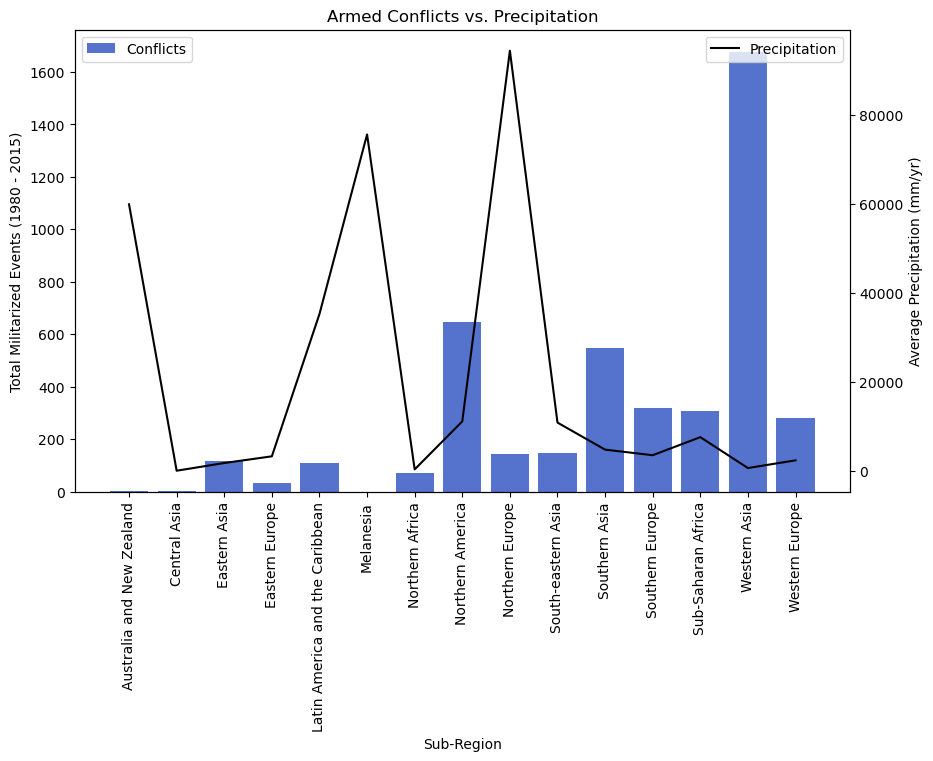

In [18]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the primary axis
sns.barplot(data=subregion_geo_df, x='sub-region', y='No. Conflicts', color='royalblue', label='Conflicts', ax=ax1)

# Add title and labels for the bar chart
ax1.set_title('Armed Conflicts vs. Precipitation')
ax1.set_xlabel('Sub-Region')
ax1.set_ylabel('Total Militarized Events (1980 - 2015)')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(subregion_geo_df['sub-region'])))
ax1.set_xticklabels(subregion_geo_df['sub-region'], rotation=90)

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line plot on the secondary axis
sns.lineplot(data=subregion_geo_df, x='sub-region', y='FrshW / Cap', color='black', label='Precipitation', ax=ax2)
ax2.set_ylabel('Average Precipitation (mm/yr)', color='black')

# Show the plot
plt.show()

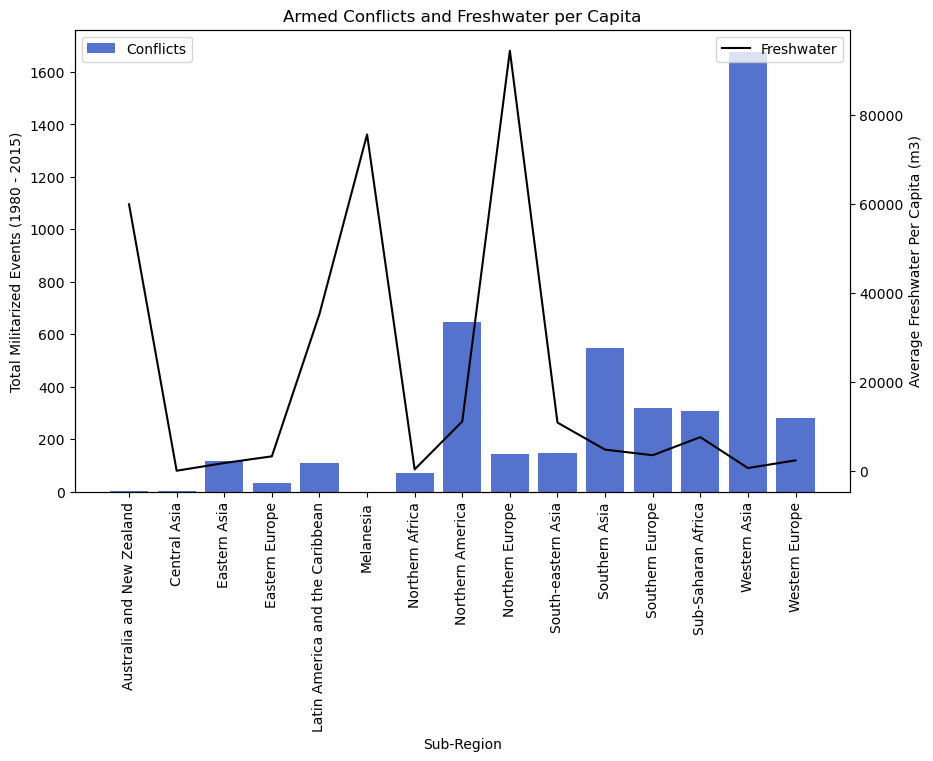

In [19]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the primary axis
sns.barplot(data=subregion_geo_df, x='sub-region', y='No. Conflicts', color='royalblue', label='Conflicts', ax=ax1)

# Add title and labels for the bar chart
ax1.set_title('Armed Conflicts and Freshwater per Capita')
ax1.set_xlabel('Sub-Region')
ax1.set_ylabel('Total Militarized Events (1980 - 2015)')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(subregion_geo_df['sub-region'])))
ax1.set_xticklabels(subregion_geo_df['sub-region'], rotation=90)

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line plot on the secondary axis
sns.lineplot(data=subregion_geo_df, x='sub-region', y='FrshW / Cap', color='black', label='Freshwater', ax=ax2)
ax2.set_ylabel('Average Freshwater Per Capita (m3)', color='black')

# Show the plot
plt.show()

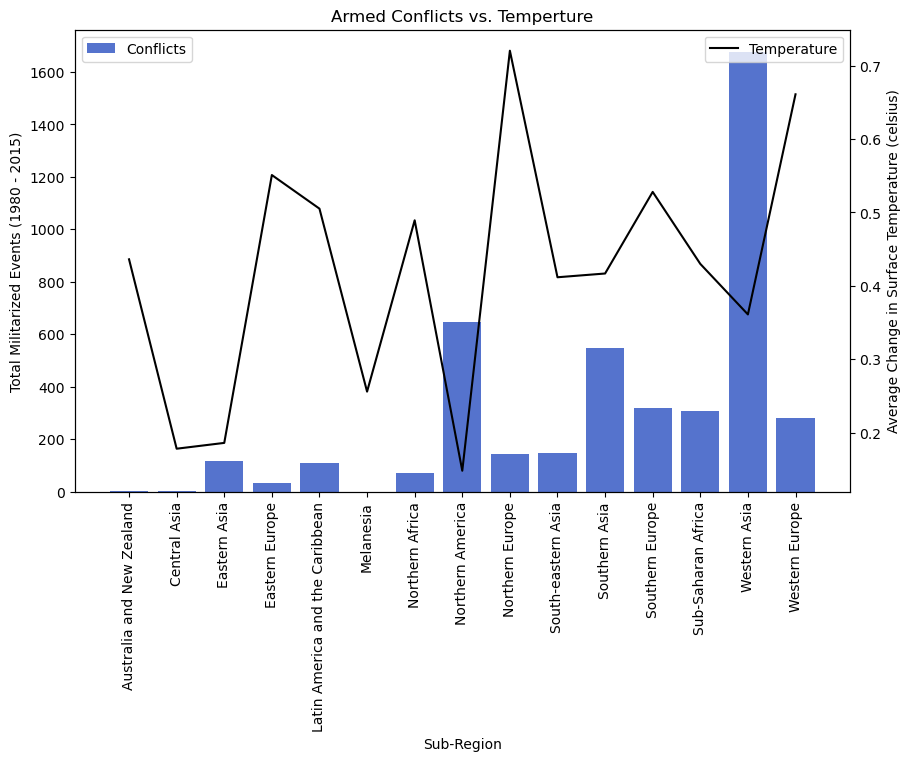

In [20]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the primary axis
sns.barplot(data=subregion_geo_df, x='sub-region', y='No. Conflicts', color='royalblue', label='Conflicts', ax=ax1)

# Add title and labels for the bar chart
ax1.set_title('Armed Conflicts vs. Temperture')
ax1.set_xlabel('Sub-Region')
ax1.set_ylabel('Total Militarized Events (1980 - 2015)')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(subregion_geo_df['sub-region'])))
ax1.set_xticklabels(subregion_geo_df['sub-region'], rotation=90)

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line plot on the secondary axis
sns.lineplot(data=subregion_geo_df, x='sub-region', y='Surf Temp', color='black', label='Temperature', ax=ax2)
ax2.set_ylabel('Average Change in Surface Temperature (celsius)', color='black')

# Show the plot
plt.show()

#### Country Box Plots

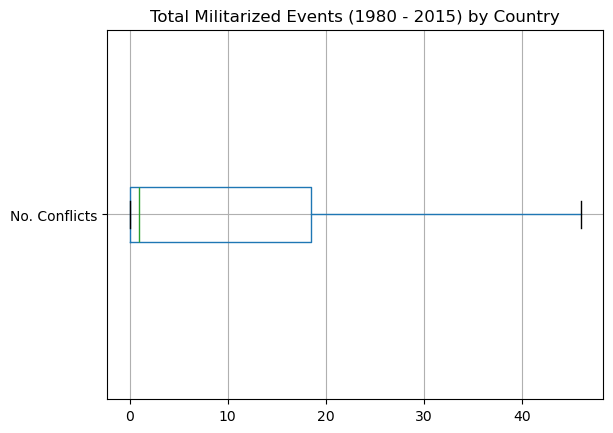

In [21]:
# Build a box plot - Conflicts
ncc_box1 = country_geo_df.boxplot(column=['No. Conflicts'], vert=False, showfliers=False)

# Add a title
plt.title('Total Militarized Events (1980 - 2015) by Country')
plt.show()

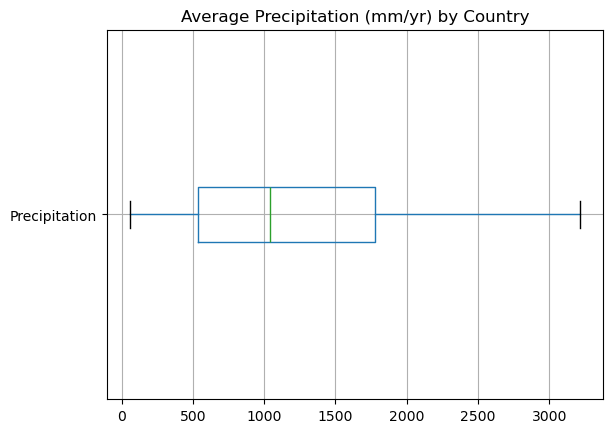

In [22]:
# Build a box plot
psc_box1 = country_geo_df.boxplot(column=['Precipitation'], vert=False, showfliers=False)

# Add a title
plt.title('Average Precipitation (mm/yr) by Country')
plt.show()

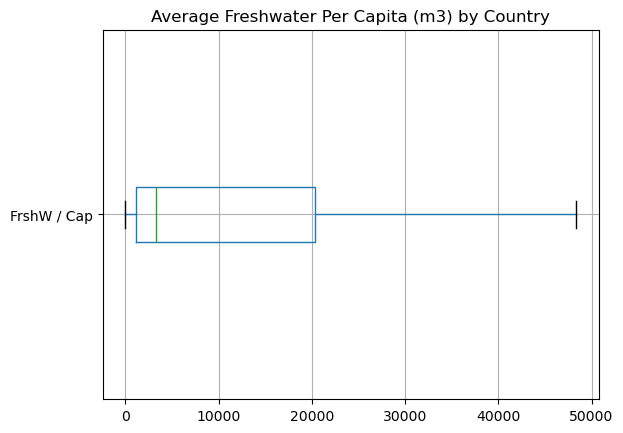

In [23]:
# Build a box plot
fwx_box1 = country_geo_df.boxplot(column=['FrshW / Cap'], vert=False, showfliers=False)

# Add a title
plt.title('Average Freshwater Per Capita (m3) by Country')
plt.show()

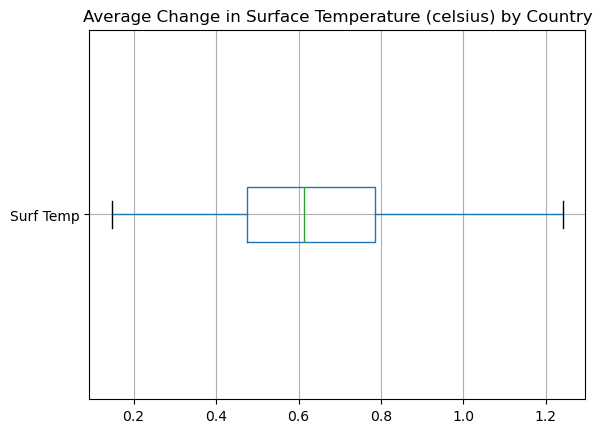

In [24]:
# Build a box plot
stc_box1 = country_geo_df.boxplot(column=['Surf Temp'], vert=False, showfliers=False)

# Add a title
plt.title('Average Change in Surface Temperature (celsius) by Country')
plt.show()

#### Country Scatter Plots & Linear Regression

In [48]:
# Define the specific columns to include for analysis using in the Z-score calculation
columns_to_include = ['Precipitation', 'FrshW / Cap', 'No. Conflicts']

# Calculate Z-scores for the selected columns
z_scores = np.abs((country_geo_df[columns_to_include] - country_geo_df[columns_to_include].mean()) / country_geo_df[columns_to_include].std())

# Define a threshold for outliers (e.g., Z-score greater than 3)
threshold = 3

# Filter out the outliers based on the threshold and convert to a DataFrame
filtered_cgeo_df = country_geo_df[(z_scores < threshold).all(axis=1)]

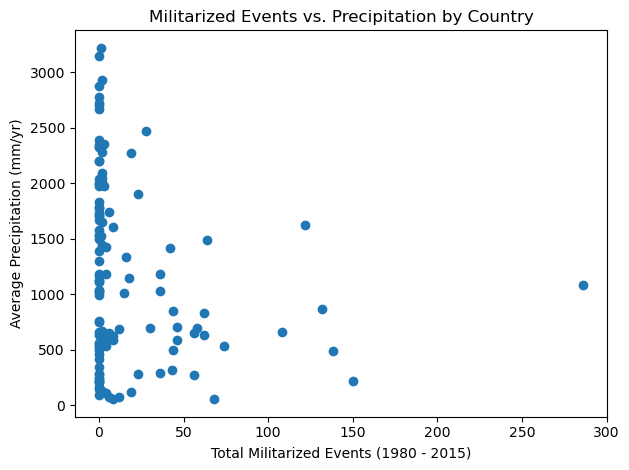

In [49]:
# Build scatter plot
x_psc = filtered_cgeo_df['No. Conflicts']
y_psc = filtered_cgeo_df['Precipitation']

# Create the scatterplot
fig12_psc = plt.scatter(x_psc, y_psc)

# Incorporate the other graph properties
plt.xlabel(f'Total Militarized Events (1980 - 2015)')
plt.ylabel(f'Average Precipitation (mm/yr)')
plt.title(f'Militarized Events vs. Precipitation by Country')

# Show plot
plt.tight_layout()
plt.show()

The r-value is: 0.03898135627535198


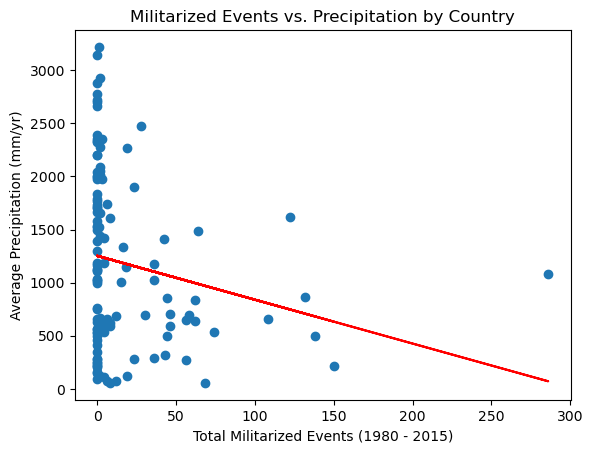

In [50]:
# Linear regression on previous plot
fig13_psc_lr = linear_regression_plot(x_psc, y_psc)

# Incorporate the other graph properties
plt.xlabel(f'Total Militarized Events (1980 - 2015)')
plt.ylabel(f'Average Precipitation (mm/yr)')
plt.title(f'Militarized Events vs. Precipitation by Country')
plt.annotate(fig13_psc_lr, (400,0), fontsize = 15, color = "red")

# Show plot
plt.show()

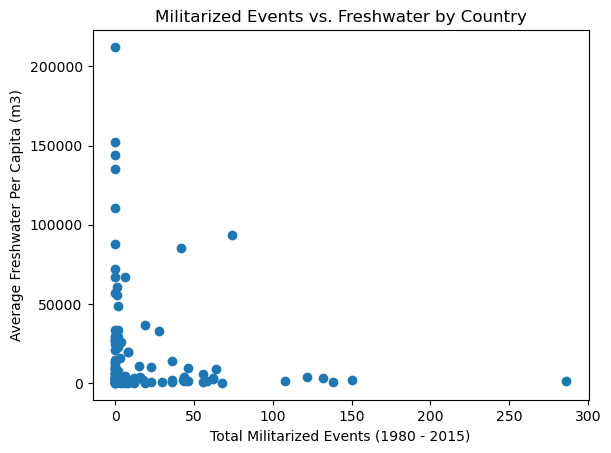

In [51]:
# Build scatter plot
x_fwc = filtered_cgeo_df['No. Conflicts']
y_fwc = filtered_cgeo_df['FrshW / Cap']

# Create the scatterplot
fig14_fwc = plt.scatter(x_fwc, y_fwc)

# Incorporate the other graph properties
plt.xlabel(f'Total Militarized Events (1980 - 2015)')
plt.ylabel(f'Average Freshwater Per Capita (m3)')
plt.title(f'Militarized Events vs. Freshwater by Country')

# Show plot
plt.show()

The r-value is: 0.015610460435675997


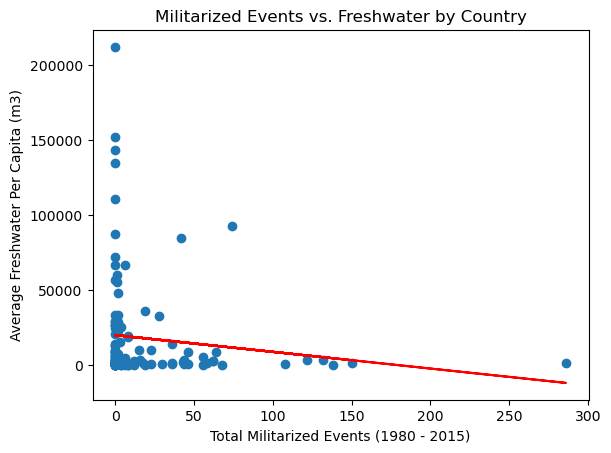

In [52]:
# Linear regression on previous plot
fig15_fwc_lr = linear_regression_plot(x_fwc, y_fwc)

# Incorporate the other graph properties
plt.xlabel(f'Total Militarized Events (1980 - 2015)')
plt.ylabel(f'Average Freshwater Per Capita (m3)')
plt.title(f'Militarized Events vs. Freshwater by Country')
plt.annotate(fig15_fwc_lr, (600,600000), fontsize = 15, color = "red")

# Show plot
plt.show()

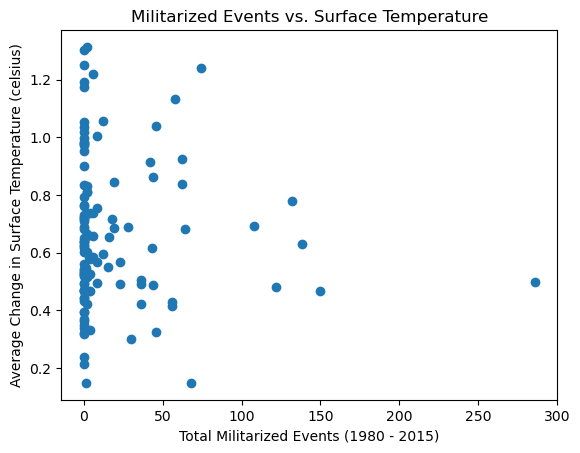

In [53]:
# Build scatter plot
x_stc = filtered_cgeo_df['No. Conflicts']
y_stc = filtered_cgeo_df['Surf Temp']

# Create the scatterplot
fig16_stc = plt.scatter(x_stc, y_stc)

# Incorporate the other graph properties
plt.xlabel(f'Total Militarized Events (1980 - 2015)')
plt.ylabel(f'Average Change in Surface Temperature (celsius)')
plt.title(f'Militarized Events vs. Surface Temperature')

# Show plot
plt.show()

The r-value is: 0.0021325217924790837


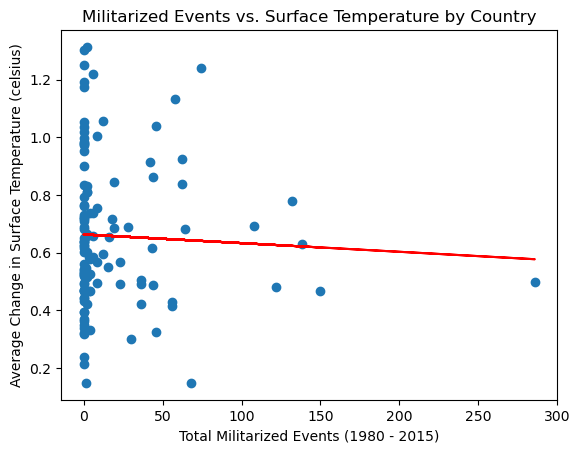

In [54]:
# Linear regression on previous plot
fig17_stc_lr = linear_regression_plot(x_stc, y_stc)

# Incorporate the other graph properties
plt.xlabel(f'Total Militarized Events (1980 - 2015)')
plt.ylabel(f'Average Change in Surface Temperature (celsius)')
plt.title(f'Militarized Events vs. Surface Temperature by Country')
plt.annotate(fig17_stc_lr, (1000,.15), fontsize = 15, color = "red")

# Show plot
plt.show()